In [1]:

import numpy as np
import pandas as pd
import math

In [2]:
shape, scale = 7., 3.5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)
s

array([32.99463032, 23.40558899, 28.56401528, ..., 49.19050643,
       22.43481562, 20.08898584])

Тут я построил плотность по гистограмме, чтобы посмотреть насколько это похоже на гамма распределение. Вывод - похоже

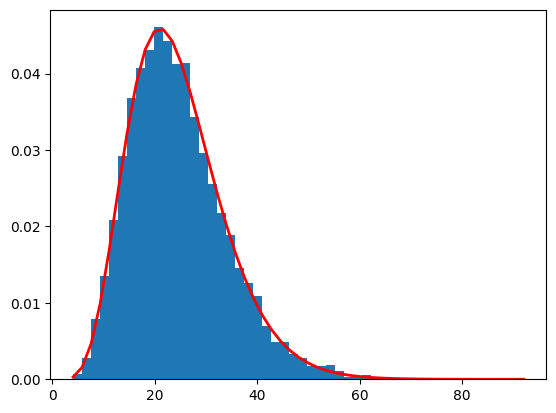

In [3]:
import matplotlib.pyplot as plt
import scipy.special as sps  
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

Проиллюстрируем ЗБЧ. Будем добавлять по 1 элементу к сумме, делить на текущее количество и смотреть как близко к матожиданию оно лежит

In [4]:
def count_sn(new):
    sn = 0
    temp = 0
    res = []
 
    for count, value in enumerate(new):
        temp = (sn + value)/(count + 1)
        sn += value
        res.append(temp)
    return res

[]

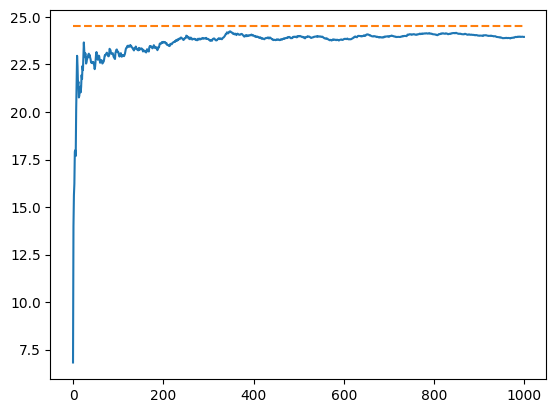

In [5]:


new = np.random.gamma(shape, scale, 1000)
ns = [n for n in range(len(new))]
r = [24.5 for i in range(len(new))]

res = count_sn(new)

plt.plot(res)
plt.plot(ns, r, linestyle='--')
plt.plot()

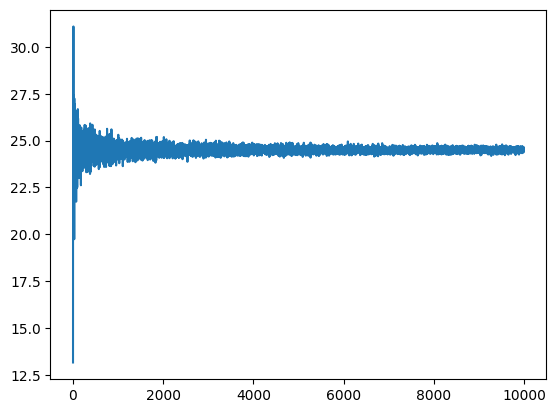

In [6]:
import numpy as np
k = []
k1 = []
for i in range(1, 10000):
    k.append(np.random.gamma(shape, scale, i))
    k1.append(i)

k2 = [sum(i)/j for i, j in zip(k, k1)]

plt.plot(k1, k2)
#plt.plot(k1, func, color = 'orange')
plt.show()
 

модуль плюс сравнение с const/sqrt(i)

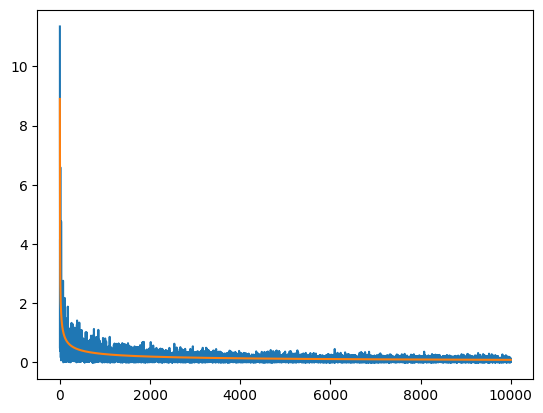

In [7]:
const = 8.9
k3 = [abs(shape*scale - i) for i in k2]
func = [const/np.sqrt(j) for j in k1]
plt.plot(k1, k3)
plt.plot(k1, func)

task 2

Сразу же посчитаем значения для дисперсии и матожидания по известным формулам (взято из википедии, сам ингтегралы не пересчитывал)

In [8]:
Egamma = scale * shape
Dgamma = scale * shape * scale
print(Egamma, Dgamma)

24.5 85.75


Тут генерируем значения для гамма распределения. 1ый параметр - количество случайных величин, из которых будет складываться сумма. 2ой параметр - размер массива, в котором будут записаны значения случайной величины, которая будет иллюстрировать цпт. 
P.S. при увеличении n2 моя случайная величина должна стремиться к стандартному нормальному (если верить ЦПТ)

In [9]:
def generate_gamma(n, n2):
    total = []
    for i in range(n2):
        s = np.random.gamma(shape, scale, n)
        total.append((sum(s) - n*Egamma)/ ((Dgamma * n) ** 0.5))
    return total

In [10]:
def gamma_density(t):
    return (shape ** scale) * (t ** (scale-1))*np.exp(-shape * t)/math.gamma(scale)

def standart_normal_density(t):
    return (1/np.sqrt(np.pi * 2) * np.exp(-(t**2)/2))

Генерируем значения стандартного нормального распределения

In [11]:
from scipy.integrate import quad
t_values = np.linspace(-5, 5, 81920)
norm_density = np.array([standart_normal_density(i) for i in t_values])
norm_distr = [quad(standart_normal_density, -10, i)[0] for i in t_values]
norm_distr

[2.866515718791943e-07,
 2.8683311380715834e-07,
 2.870147665719901e-07,
 2.871965302386507e-07,
 2.8737840487213557e-07,
 2.875603905374799e-07,
 2.8774248729975244e-07,
 2.879246952240619e-07,
 2.881070143755459e-07,
 2.882894448193881e-07,
 2.884719866208009e-07,
 2.886546398450402e-07,
 2.8883740455739023e-07,
 2.890202808231803e-07,
 2.892032687077686e-07,
 2.893863682765567e-07,
 2.8956957959497413e-07,
 2.8975290272849995e-07,
 2.8993633774263493e-07,
 2.901198847029295e-07,
 2.903035436749612e-07,
 2.9048731472434817e-07,
 2.9067119791674714e-07,
 2.9085519331784856e-07,
 2.91039300993381e-07,
 2.9122352100910894e-07,
 2.9140785343083344e-07,
 2.9159229832439536e-07,
 2.9177685575566796e-07,
 2.9196152579056433e-07,
 2.92146308495033e-07,
 2.9233120393506026e-07,
 2.925162121766711e-07,
 2.9270133328591993e-07,
 2.9288656732890936e-07,
 2.9307191437176744e-07,
 2.932573744806702e-07,
 2.934429477218202e-07,
 2.9362863416146686e-07,
 2.938144338658869e-07,
 2.9400034690140473e-0

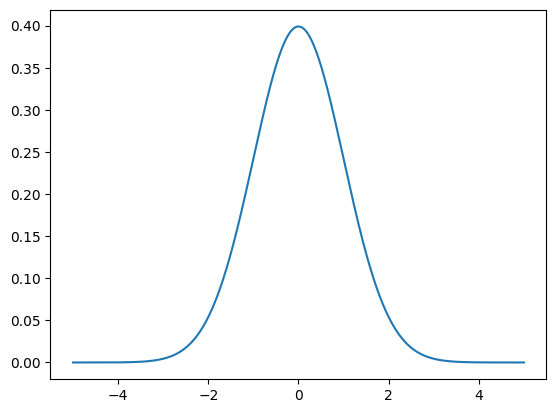

In [12]:
import math
import scipy.stats as stats
import seaborn as sns
import pandas as pd
plt.plot(t_values, norm_density)

Distribution_Func - класс, который содержит два поля(для инициализации требуется список). 1. Значения случайной величины (values), 2. Вероятность в функции распределения (probabilities) (пример: (0, 1, 2) - values, (1/3, 2/3, 3/3) - probabilities). Так же имеется метод distr_val(t) - работает как функция распределения, для t вещественного выдает значение случайной величины быть меньше T 

In [13]:
from distribution_func import Distribution_Func


Графическая интерпретация для увеличивающегося n2, n - константа, которая достаточно близко приближает матожидание, умноженное на n (чем больше n, тем точнее). Значение n выведено умственно-зрительными заключениями из первого номера лабы. Если графики функций распределения поставить на 1 график, то они сольются. Поэтому они разделены на 2 разных графика

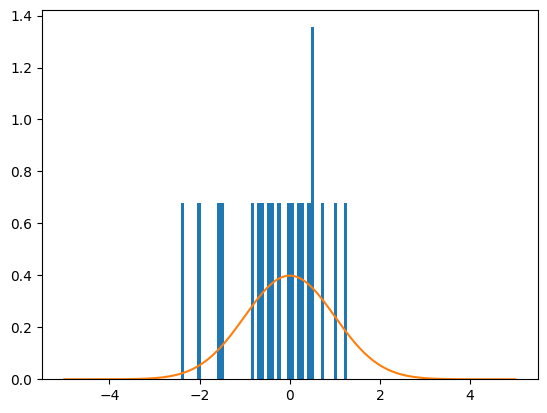

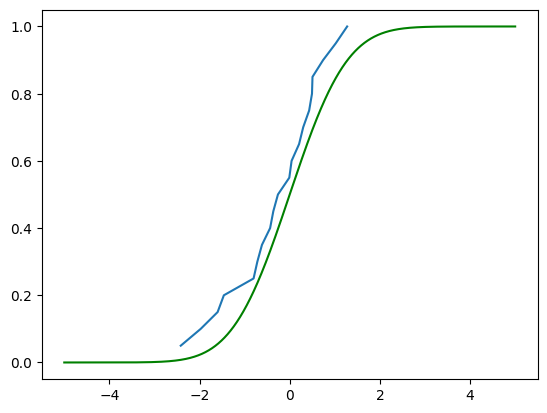

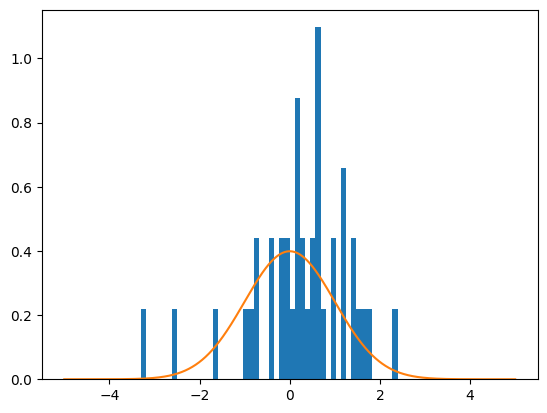

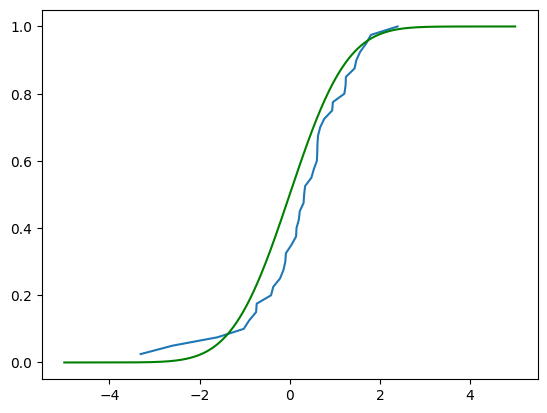

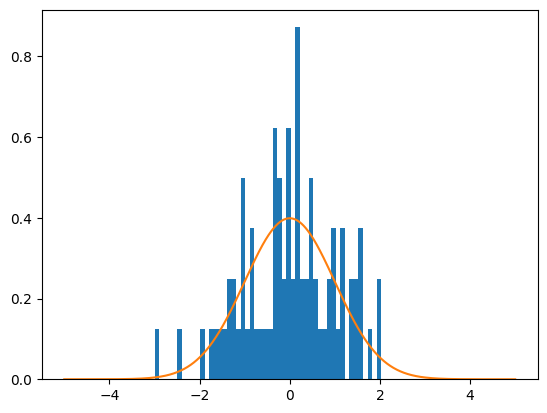

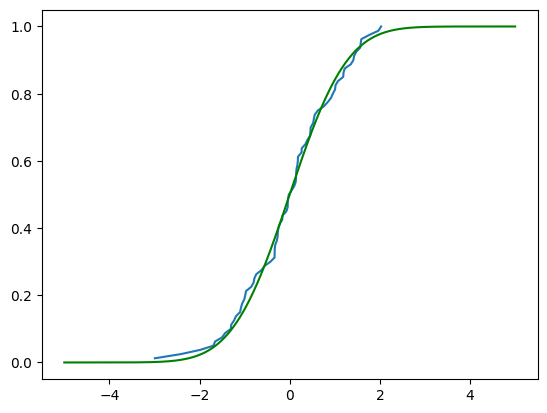

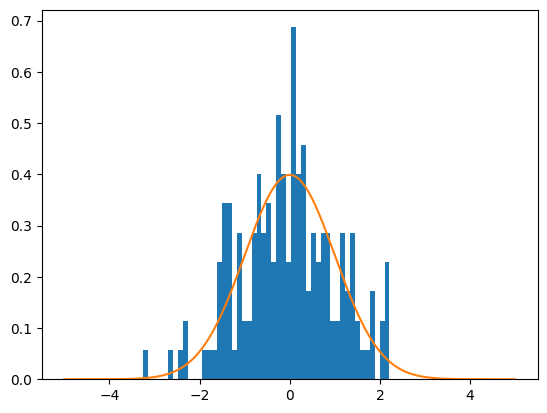

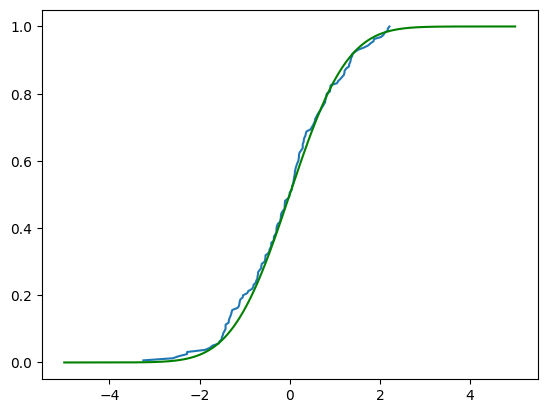

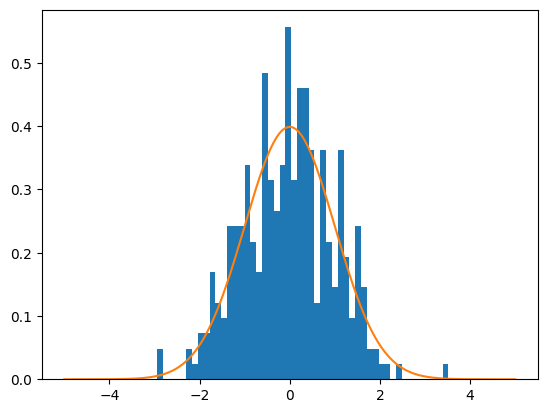

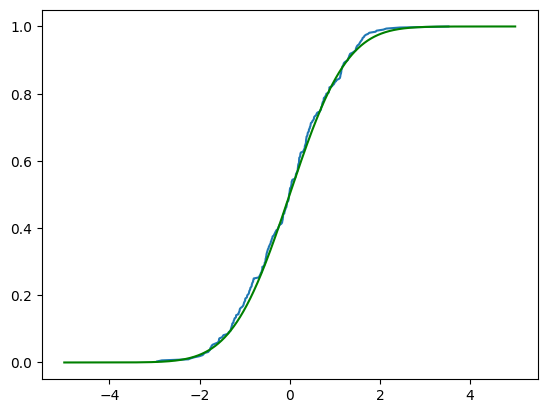

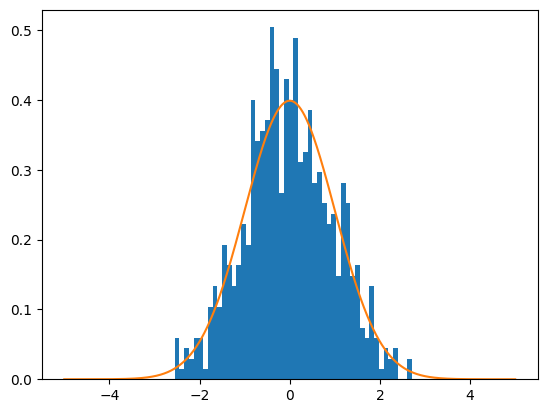

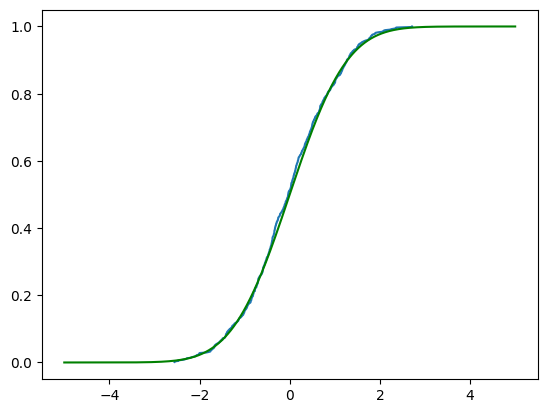

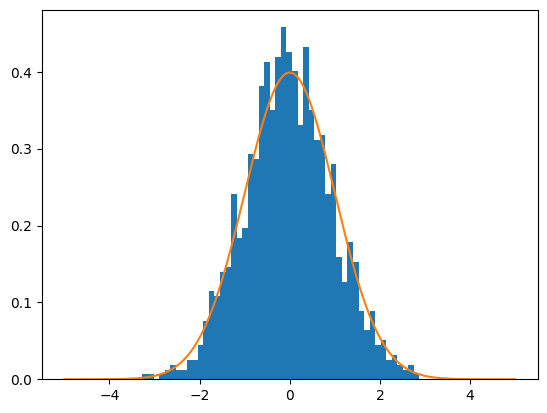

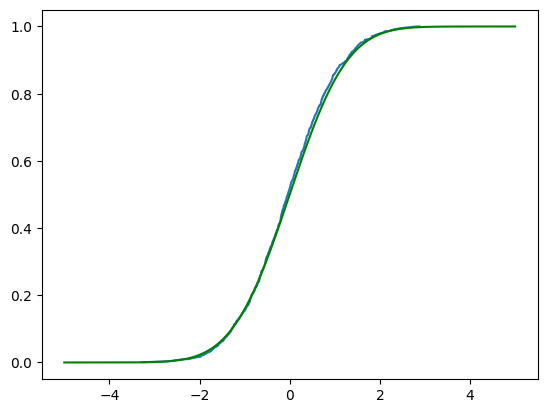

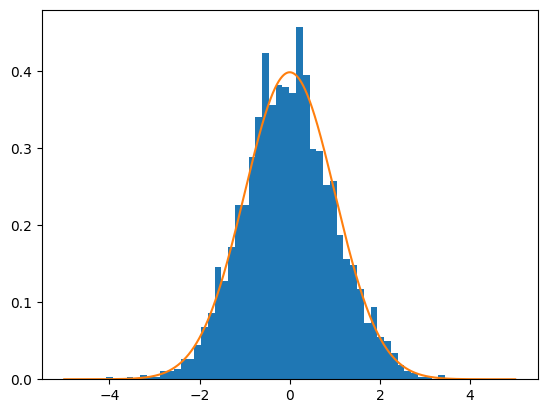

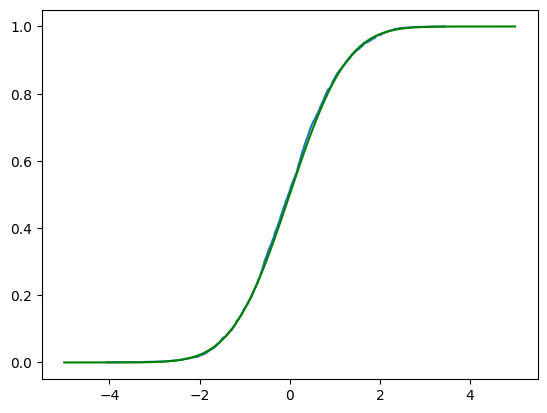

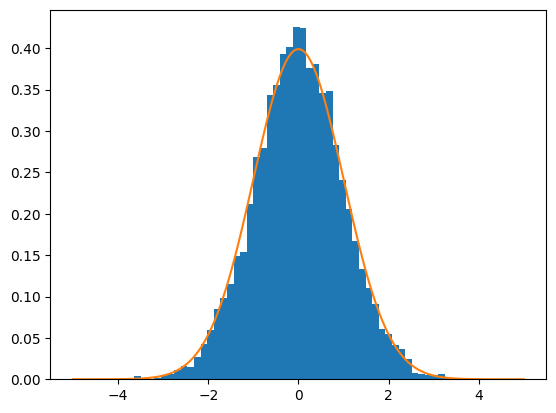

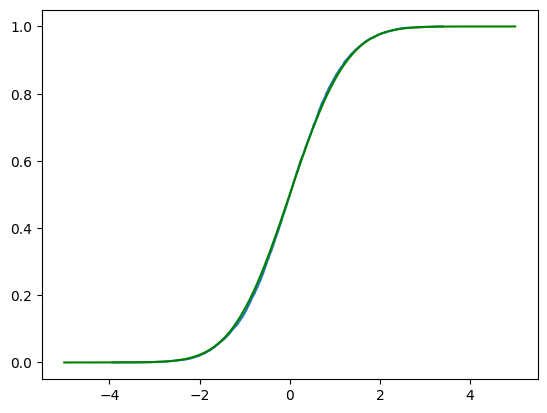

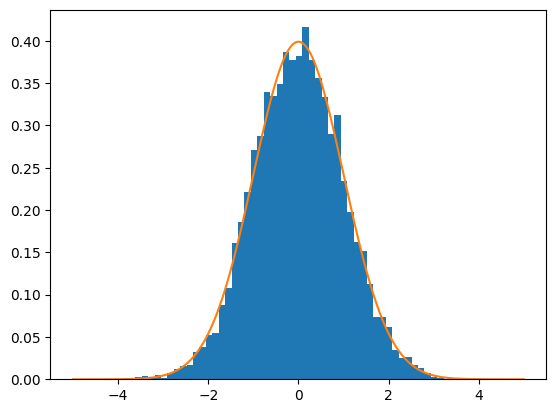

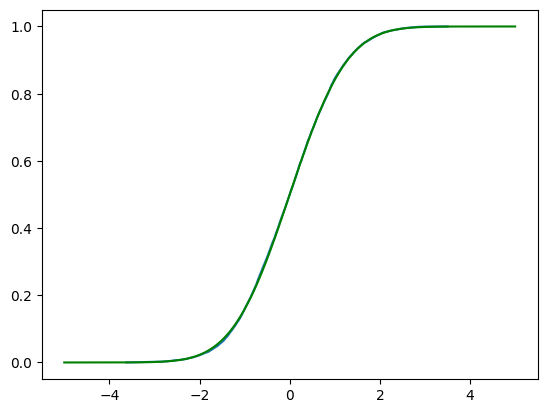

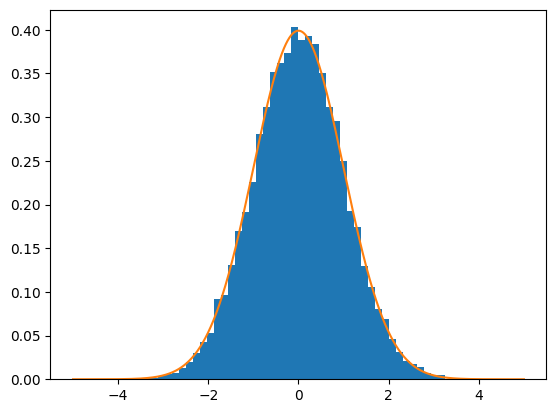

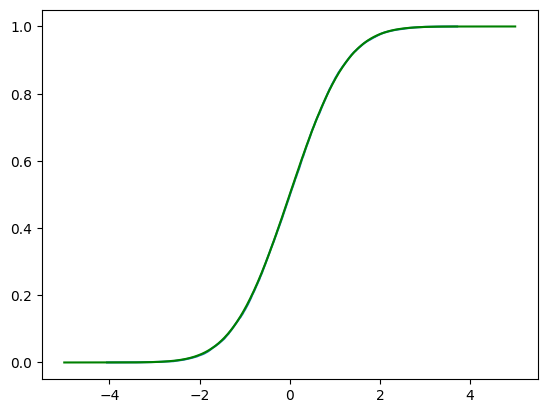

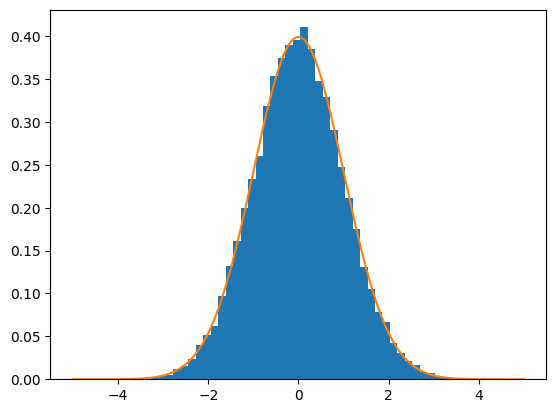

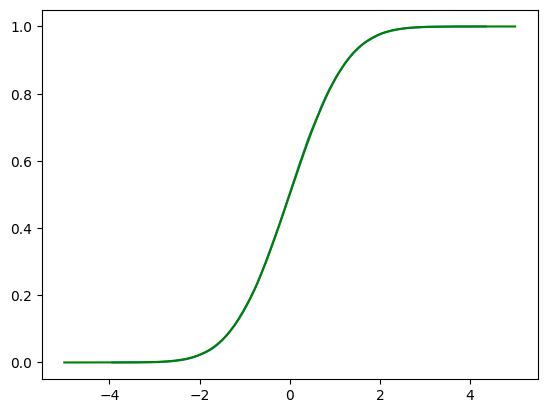

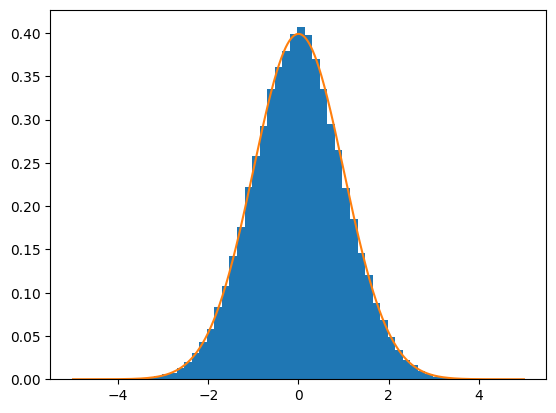

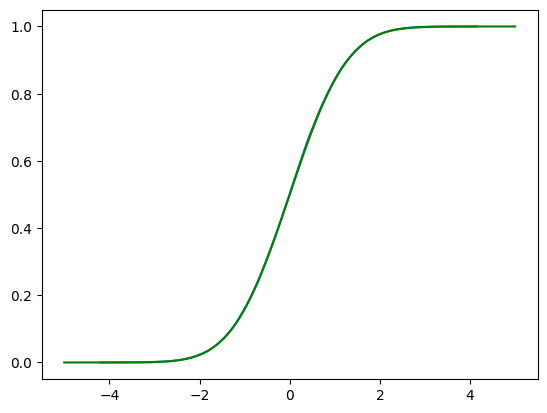

In [14]:

n2 = 10

for _ in range(13):
    n2 *= 2
    l = Distribution_Func(generate_gamma(1000, n2))

    plt.hist(l.values, density=True, bins=50, label = 'Sample')
    plt.plot(t_values, norm_density)
    plt.show()
    plt.close()
    plt.plot(l.values, l.probabilities)
    plt.plot(t_values, norm_distr, color = 'green')
    # sns.displot(op,kind='ecdf')
    plt.show()


    



сравним функцию распределения, сгенерированную seabornом и мою. Видно, что у seaborn прикольно сделаны тонкие хвосты, но, в целом, графики идентичны. Значит функция из моего класса работает корректно, в дальнейшем будем пользоваться её значениями

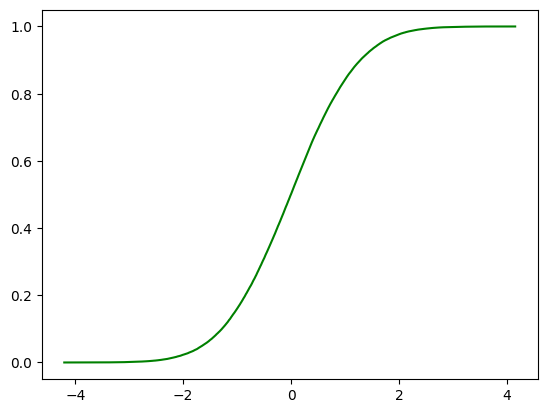

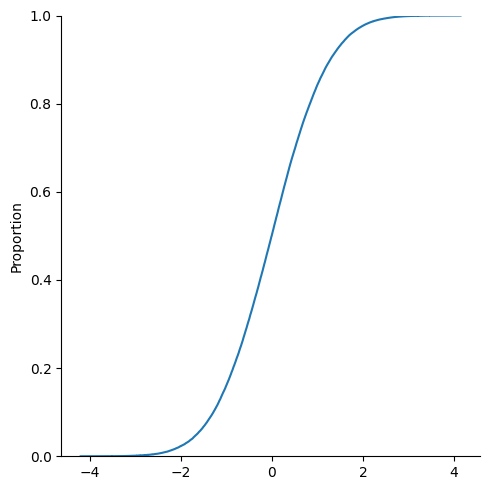

In [15]:

plt.plot(l.values, l.probabilities, color='green')
sns.displot(l.values, kind = 'ecdf')
plt.show()


сравним 2 функции распределенная, полученная эмпирически по цпт и стандартное нормальное из нумпай

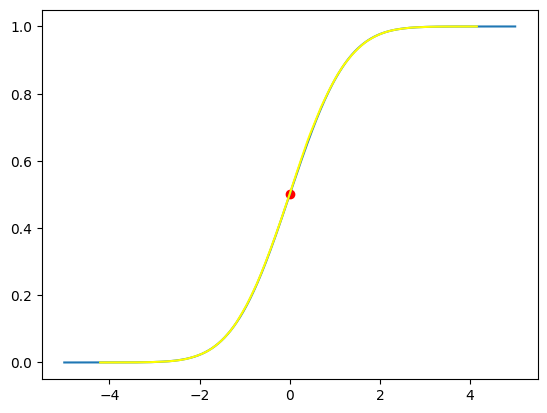

In [16]:

    
plt.plot(t_values, norm_distr)
plt.plot(l.values, l.probabilities,  color = 'yellow')
plt.scatter(0, 0.5, color = 'red')
plt.show() 

Теперь воспользуемся теоремой гливенко Контелли для нахождения разницы между распределениями. t для функции распределения взято в промежутке от -4 до 4, так как дальше уже очень тонкие хвосты и рассматривать их не вижу большого смысла. вырезал так как считает очень долго

task 3

In [17]:
def lambd(t):
    return np.sin(t)
T = np.pi

https://habr.com/ru/post/210432/ Статья из которой я взял генерацию процесса Пуассона.У меня функция периодическая. Алгоритм взят оттуда. Функция, ограничивающая лямбда является 1

In [28]:
def generate_poisson(f, T, n):
    new = []
    for _ in range(n):
        time = 0
        k = 0
      
        while time < T:
            Exp = np.random.exponential(1)

            """Посмотрите сюда"""
            time += Exp # вот если тут поделить на 2, то все будет прикольно
            U = np.random.uniform(0, 1)
            if U <= f(time) and time <= T:
                k += 1
                new.append(time)
            
    return sorted(new)

пример выборки, которая может получиться

In [29]:
gen = generate_poisson(lambd, T, 100)
print(gen)

[0.11883645211225981, 0.2169611297901184, 0.25992471348539226, 0.3214655540161301, 0.33640882793261634, 0.39628272025327943, 0.4412571248425691, 0.46435309241475714, 0.4803857831788709, 0.5475502109415357, 0.5543143480629115, 0.5576095998914605, 0.5725984250230564, 0.594083015774381, 0.6036124007565521, 0.6077546563020273, 0.6180843038395117, 0.6259409211005935, 0.6289081210215964, 0.641077857918313, 0.6613097242045083, 0.6879223594349735, 0.6883885106779999, 0.6968677761733614, 0.7024158056422232, 0.7040571411741271, 0.7149603058270243, 0.7315788469997201, 0.7373723403760102, 0.7471374084424767, 0.7506096767679619, 0.7769012637534042, 0.798637838789457, 0.8043151815429541, 0.8094876625815395, 0.8118760990560939, 0.8341712912260244, 0.8343399444698144, 0.8351045976638752, 0.8366065852555155, 0.8555978954789516, 0.8557180889181246, 0.8722973269011941, 0.8953384996467394, 0.9194246057890235, 0.9242506096213126, 0.9248351492229068, 0.9265258552941003, 0.9351993357147174, 0.944361755783940

Посчитаем эмпирически функцию интенсивности. Разобьем отрезок, Будем смотреть сколько точек попало в каждый промежуток. Далее отнормирем количество точек. Очевидно, что максимум точек попал в вершине синуса, поделим на это значение, это и будет нормировка

In [33]:
def amount_of_points(values):
    x_axis = []
    amount = []
    dt = 0.01
    new = np.arange(0, T, dt)
    for i in new:
        x_axis.append(i)
        c = 0
        for j in values:
            if i < j <= i + dt:
                c += 1
        
        amount.append(c)
    k = max(amount)
    amount = [i/k for i in amount]
    return x_axis, amount

Как это выглядит на графике лямбды

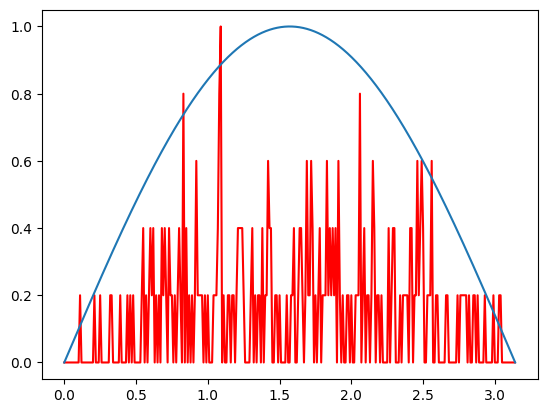

In [34]:
t = np.linspace(0, np.pi, 10000000)

val_for_poi = amount_of_points(gen)
val = [lambd(i) for i in t]
plt.plot(val_for_poi[0], val_for_poi[1], color = 'red')
plt.plot(t, val)
plt.show()


теперь будем постепенно увеличивать количество экспериментов

In [22]:
# n = 10
# for _ in range(15):
#     gen = generate_poisson(lambd, T, n)
#     val_for_poi = amount_of_points(gen)
#     plt.plot(val_for_poi[0], val_for_poi[1], color = 'green')
#     plt.plot(t, val, color = 'orange')
#     plt.title(f"n = {n}")
#     plt.show()
#     n *= 2



In [35]:
def amount_of_points_different_normalization(values):
    x_axis = []
    amount = []
    dt = 0.01
    new = np.arange(0, T, dt)
    for i in new:
        x_axis.append(i)
        c = 0
        for j in values:
            if i < j <= i + dt:
                c += 1
        
        amount.append(c)
    k = len(values)
    """вот тут умножение на двойку"""
    amount = [i/(k*dt)*2 for i in amount]
    return x_axis, amount

999.28


NameError: name 'n' is not defined

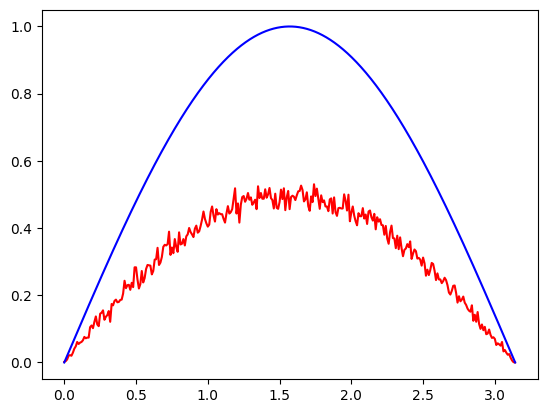

In [24]:
# gen = generate_poisson(lambd, T, 100000)
# val_for_poi = amount_of_points_different_normalization(gen)
# print(len(gen) * 0.01)
# plt.plot(val_for_poi[0], val_for_poi[1], color = 'red')
# plt.plot(t, val, color = 'blue')
# plt.title(f"n = {n}")
# plt.show()
# print(max(val_for_poi[0]))

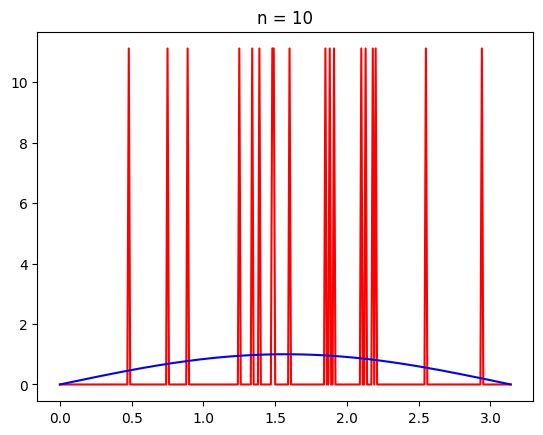

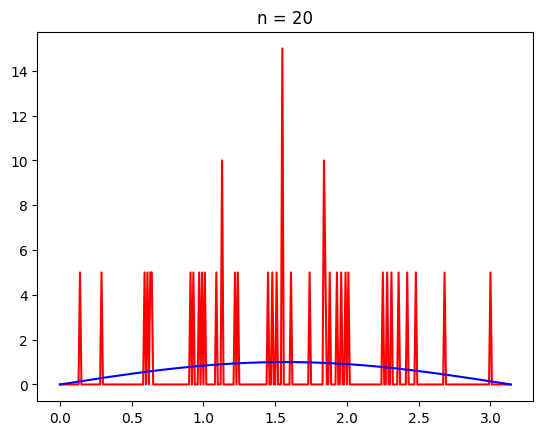

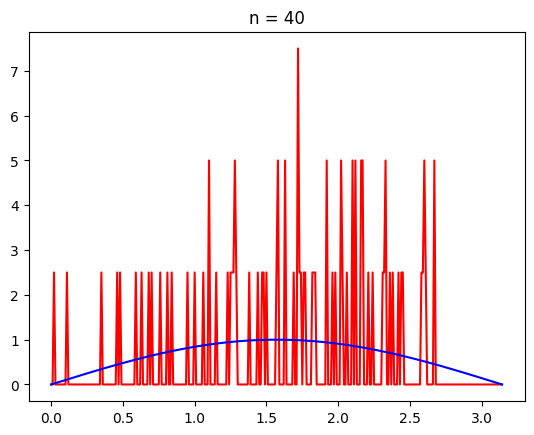

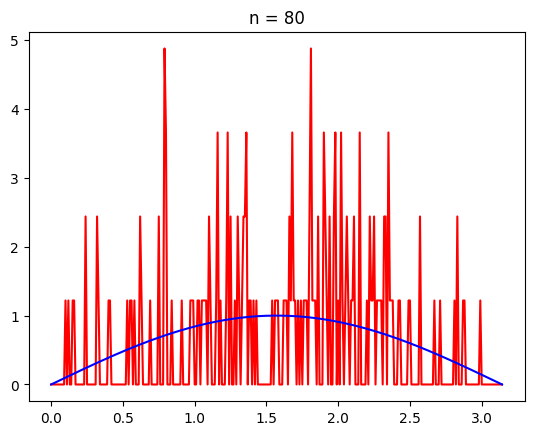

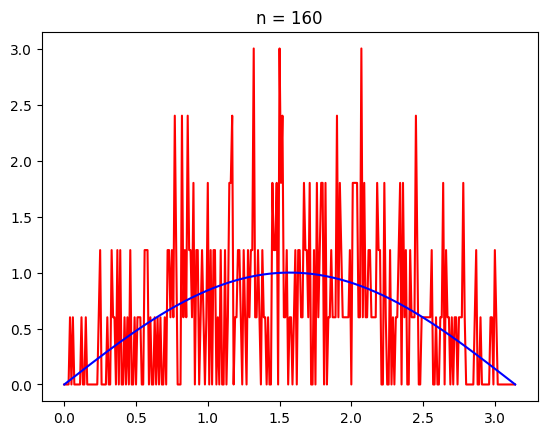

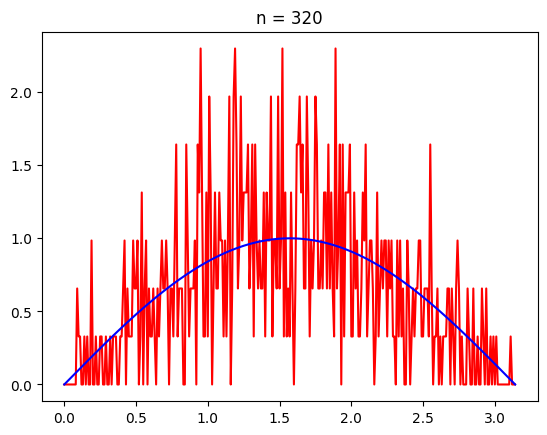

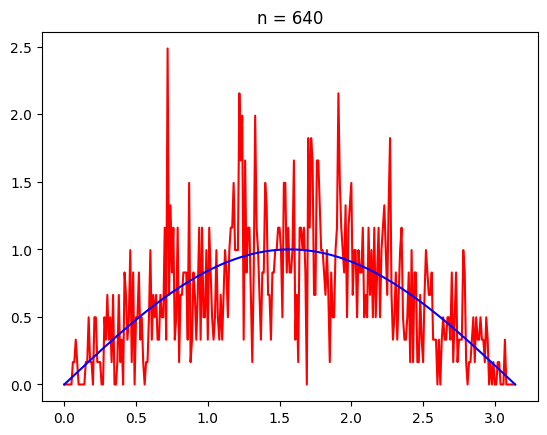

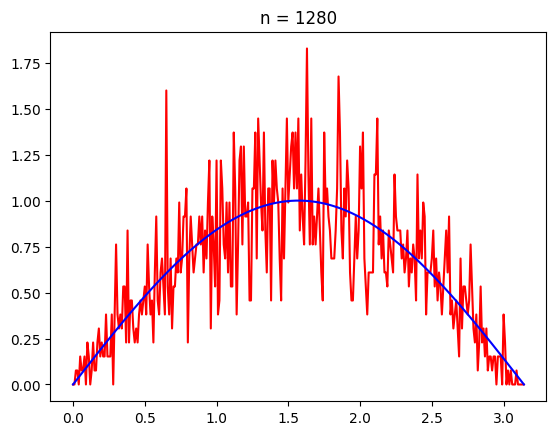

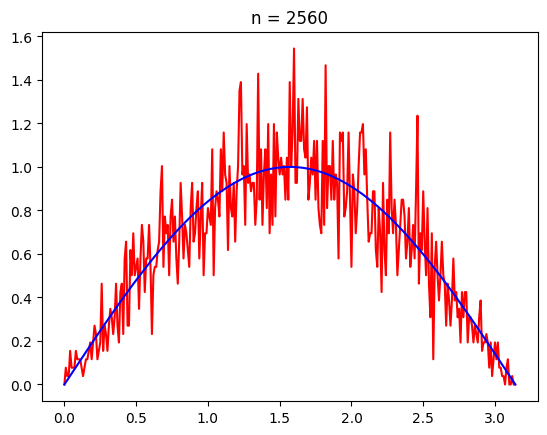

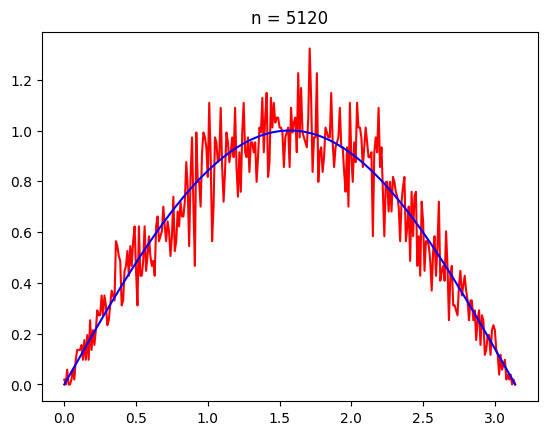

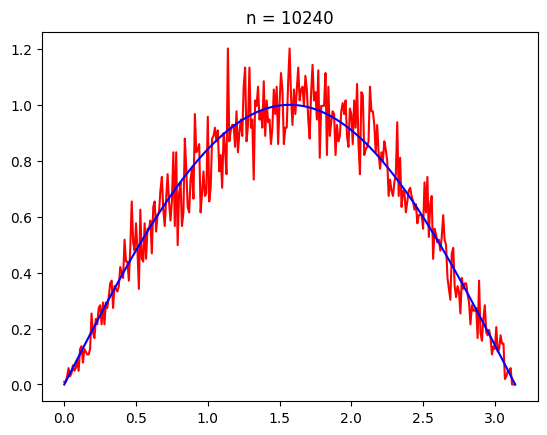

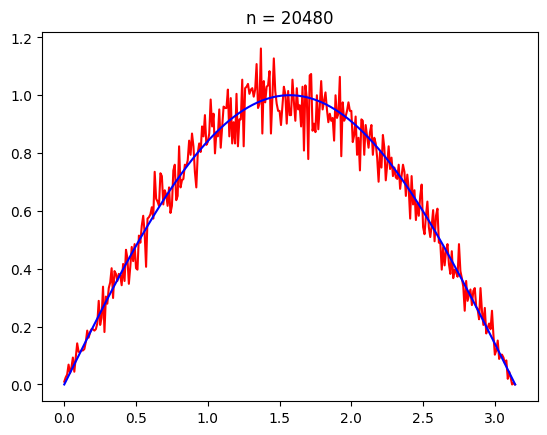

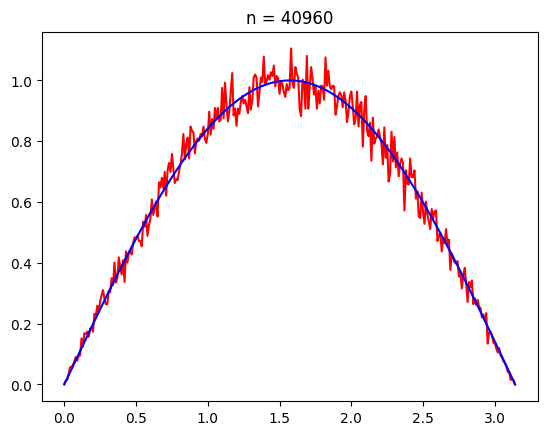

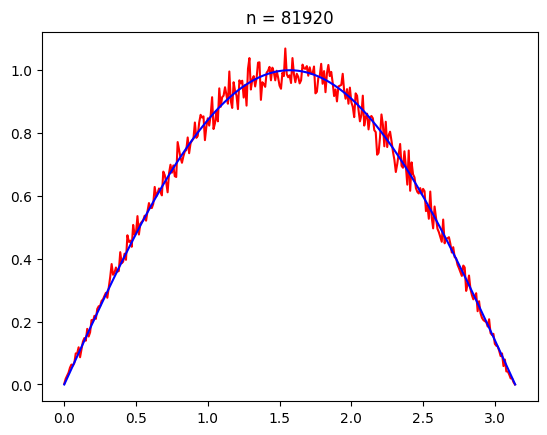

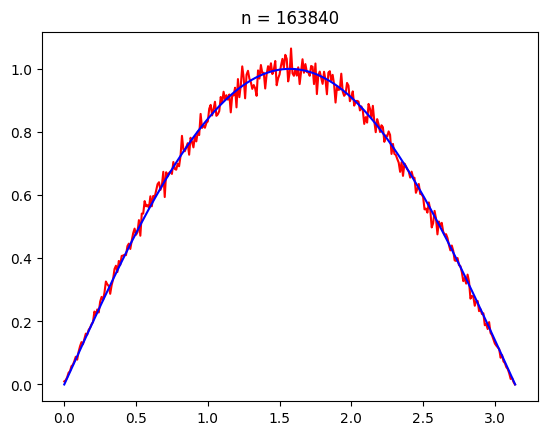

In [36]:
n = 10
for _ in range(15):
    gen = generate_poisson(lambd, T, n)
    val_for_poi = amount_of_points_different_normalization(gen)
    plt.plot(val_for_poi[0], val_for_poi[1], color = 'red')
    plt.plot(t, val, color = 'blue')
    plt.title(f"n = {n}")
    plt.show()
    n *= 2